In [1]:
import pandas as pd

df = pd.read_csv('my_project_1.tab', skiprows=13, header=None, delim_whitespace=True, names = ['rho','vp','vs'])

#rhos = df.rho.tolist()

In [2]:
import subprocess
def cut_value_from_line(lineno=5):
    output = subprocess.check_output("sed -n -e %sp *.tab" % lineno, shell=True)
    return float(str(output).strip("\\n'").strip("b'").strip())

p1=cut_value_from_line(5)
dp=cut_value_from_line(6)
np=int(cut_value_from_line(7))

t1=cut_value_from_line(9)
dt=cut_value_from_line(10)
nt=int(cut_value_from_line(11))


from numpy import arange
ps = arange(np)*dp + p1
ts = arange(nt)*dt + t1

In [10]:
from numpy import array, nan

rhos = array(df.rho.tolist()).reshape(nt,np)
vps = array(df.vp.tolist()).reshape(nt,np)
vss = array(df.vs.tolist()).reshape(nt,np)

rhos[rhos<10] = nan
vps[vps>20]   = nan
vss[vss>20]   = nan


/Users/mancinelli/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/Users/mancinelli/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [11]:
!head -n 20 *.tab

|6.6.6
my_project_1.tab                                                                                    
           2
P(bar)  
   10.000000000000000     
   1515.0505050505051     
         100
T(K)    
   800.00000000000000     
   14.141414141414142     
         100
           3
rho,kg/m3      vp,km/s        vs,km/s       
  3218.27        6.99945        3.40149     
  3223.09        7.78983        4.49432     
  3228.04        7.80767        4.49895     
  3233.24        7.82586        4.50428     
  3307.62        7.97401        4.63507     
  3312.15        7.99221        4.63912     
  3316.62        8.01018        4.64322     


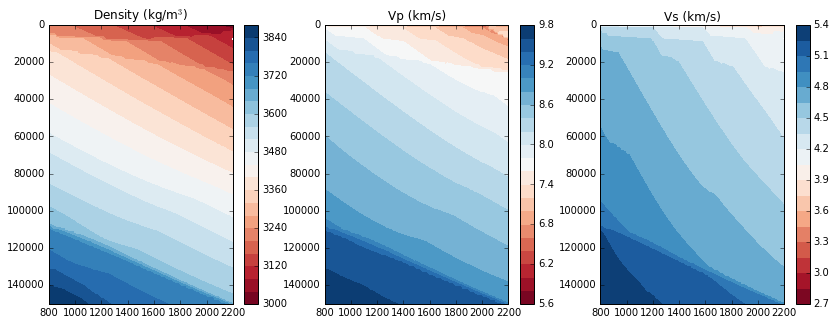

In [12]:
from matplotlib import pylab as plt
%matplotlib inline

plt.figure(1,(14,5))

#plt.imshow(rhos.T,vmin=3000,vmax=4000,origin='upper',cmap='RdBu_r', extent= [min(ps),t2,p1,p2],aspect='auto')

titles = ['Density (kg/m$^3$)','Vp (km/s)',"Vs (km/s)"]

for ii,array in enumerate([rhos, vps, vss]):
    _ = plt.figure(1)
    _ = plt.subplot(1,3,ii+1)
    _ = plt.contourf(ts,ps,array.T,25,cmap='RdBu')
    _ = plt.colorbar()
    plt.title(titles[ii])
    plt.ylim(max(ps),0)